In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class NonStationaryBandit:
    def __init__(self, k=10, mu=0, sigma=0.01):
        self.k = k
        self.mu = mu
        self.sigma = sigma
        self.q_star = np.zeros(k)

    def step(self):
        # Update true action values
        self.q_star += np.random.normal(self.mu, self.sigma, self.k)

    def pull(self, action):
        return np.random.normal(self.q_star[action], 1)

In [3]:
class SampleAverageAgent:
    def __init__(self, k, epsilon):
        self.k = k
        self.epsilon = epsilon
        self.Q = np.zeros(k)
        self.N = np.zeros(k)

    def choose_action(self):
        if np.random.random() < self.epsilon:
            return np.random.randint(self.k)
        return np.argmax(self.Q)

    def update(self, action, reward):
        self.N[action] += 1
        self.Q[action] += (reward - self.Q[action]) / self.N[action]

In [4]:
class ConstantStepSizeAgent:
    def __init__(self, k, epsilon, alpha):
        self.k = k
        self.epsilon = epsilon
        self.alpha = alpha
        self.Q = np.zeros(k)

    def choose_action(self):
        if np.random.random() < self.epsilon:
            return np.random.randint(self.k)
        return np.argmax(self.Q)

    def update(self, action, reward):
        self.Q[action] += self.alpha * (reward - self.Q[action])

In [5]:
def run_experiment(num_steps=10000, num_runs=2000):
    sample_avg_rewards = np.zeros(num_steps)
    constant_step_rewards = np.zeros(num_steps)
    sample_avg_optimal = np.zeros(num_steps)
    constant_step_optimal = np.zeros(num_steps)

    for _ in range(num_runs):
        bandit = NonStationaryBandit()
        sample_avg_agent = SampleAverageAgent(10, 0.1)
        constant_step_agent = ConstantStepSizeAgent(10, 0.1, 0.1)

        for t in range(num_steps):
            bandit.step()

            # Sample Average Agent
            action = sample_avg_agent.choose_action()
            reward = bandit.pull(action)
            sample_avg_agent.update(action, reward)
            sample_avg_rewards[t] += reward
            sample_avg_optimal[t] += int(action == np.argmax(bandit.q_star))

            # Constant Step-Size Agent
            action = constant_step_agent.choose_action()
            reward = bandit.pull(action)
            constant_step_agent.update(action, reward)
            constant_step_rewards[t] += reward
            constant_step_optimal[t] += int(action == np.argmax(bandit.q_star))

    sample_avg_rewards /= num_runs
    constant_step_rewards /= num_runs
    sample_avg_optimal /= num_runs
    constant_step_optimal /= num_runs

    return (
        sample_avg_rewards,
        constant_step_rewards,
        sample_avg_optimal,
        constant_step_optimal,
    )

In [6]:
# Run the experiment
sample_avg_rewards, constant_step_rewards, sample_avg_optimal, constant_step_optimal = (
    run_experiment()
)

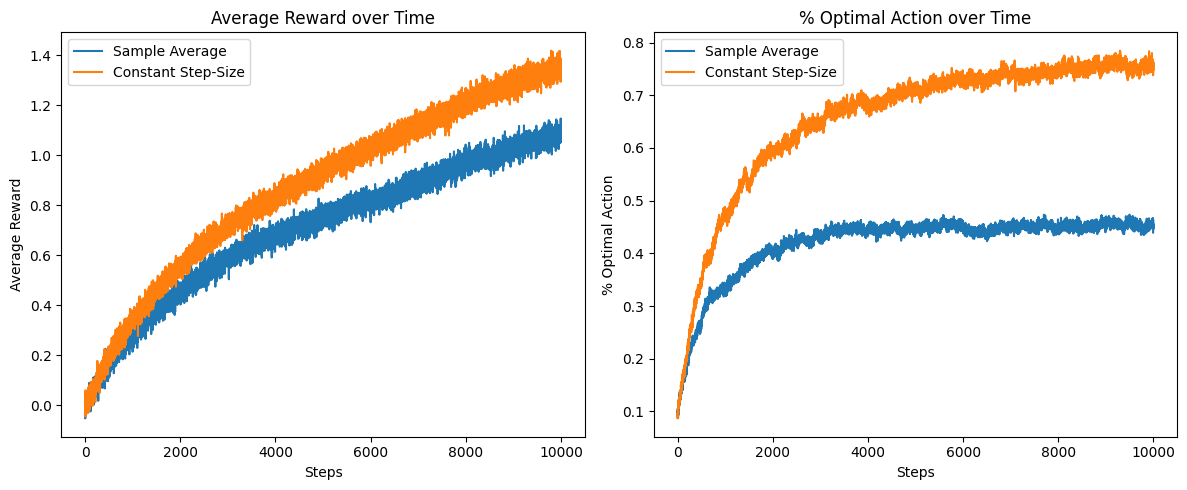

In [7]:
# Plot the results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(sample_avg_rewards, label="Sample Average")
plt.plot(constant_step_rewards, label="Constant Step-Size")
plt.xlabel("Steps")
plt.ylabel("Average Reward")
plt.title("Average Reward over Time")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(sample_avg_optimal, label="Sample Average")
plt.plot(constant_step_optimal, label="Constant Step-Size")
plt.xlabel("Steps")
plt.ylabel("% Optimal Action")
plt.title("% Optimal Action over Time")
plt.legend()

plt.tight_layout()
plt.show()